# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

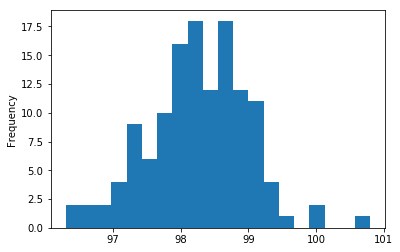

In [4]:
#1. Is the distribution of body temperatures normal?
import matplotlib.pyplot as plt
plt.figure()
df['temperature'].plot(kind = 'hist', bins = 20)
plt.show()
# Answer: As can be seen from the plot, the distribution of body temperatures resembles a normal distribution, 
#  but is not fully normal due to irregularities in dataset, such as the dip at 97.5 and 98.5 F.

In [5]:
#2. Is the sample size large? Are the observations independent?
len(df.index)
#Answer: With a sample size of 130, this dataset is large (greater than 30)
#  Since there is no correlation between observations, the observations are independent of one another.

130

In [9]:
#3. Bootstrap Hypothesis Testing: Is the true true population mean really 98.6 degrees F?
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
def diff_from_H0(data, H0=98.6):
    return np.mean(data) - H0

In [68]:
import scipy.stats as st
import numpy as np

#a. Bootstrap hypothesis test
# Null hypothesis: 
H0 = 98.6
# Alternative Hypothesis: Ha <> 98.6
df_shift = df['temperature'] - np.mean(df['temperature']) + H0
diff_obs = diff_from_H0(df['temperature'])
bs_replicates = draw_bs_reps(df_shift, diff_from_H0, len(df.index))
p_value = np.sum(bs_replicates <= diff_obs)/len(df.index)
print ('Bootstrap Hypothesis Testing: Test Statistic', diff_obs,'P-value',p_value)

#b. Frequentist statistical testing
H0 = 98.6
n = len(df.index)
avg = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
svar = np.var(df['temperature'])
# z = (x – μ) / (σ / √n)
zstat = (H0 - avg) / (sigma/np.sqrt(n))
pvalz = 2 * (1-st.norm.cdf(zstat))
print('Frequentist Statistical Testing: z: ',zstat, ' P-value: ', pvalz)
#p-value is much smaller than 0.05; null hypothesis must be rejected; Population mean extremely unlikely to be 98.6 F. 
# The one-sample test was suitable for this dataset because we are not comparing two groups

#c. t-test vs z-test
# For large datasets, it is better to use the z-statstic, since the sample mean is approximately normally distributed

#d. The other test
tstat = (H0-avg)/np.sqrt(svar/n)
pvalt = st.t.sf(np.abs(tstat), n-1)*2
print('Frequentist Statistical Testing: t: ',tstat, ' P-value: ', pvalt)

Bootstrap Hypothesis Testing: Test Statistic -0.35076923076921673 P-value 0.0
Frequentist Statistical Testing: z:  5.47592520208  P-value:  4.35231517493e-08
Frequentist Statistical Testing: t:  5.47592520208  P-value:  2.18874646241e-07


In [77]:
#Reduce Sample size to 10. It is appropriate to use the t-statistic in this case, since sample size < 30
H0 = 98.6
n = 10
avg = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
# z = (x – μ) / (σ / √n)
zstat = (H0 - avg) / (sigma/np.sqrt(n))
pvalz = 2 * (1-st.norm.cdf(zstat))
# t = 
tstat = (H0-avg)/np.sqrt(svar/n)
pvalt = st.t.sf(np.abs(tstat), n-1)*2
print('Frequentist Statistical Testing: z: ',zstat, ' P-value: ', pvalz)
print('Frequentist Statistical Testing: t: ',tstat, 'P-value: ',pvalt)
# With the smaller sample size, it appears the null hypothesis is now more likely to be acceptable and cannot be rejected.

Frequentist Statistical Testing: z:  1.51874839205  P-value:  0.128825840683
Frequentist Statistical Testing: t:  1.51874839205 P-value:  0.163142136002


In [55]:
#5. What is Abnormal Body Temperature?
import scipy as sp
# Compute Confidence Interval and Margin of Error
def confidence_interval(data, confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m = np.mean(a)
    se = sp.stats.sem(a)
    h = se * sp.stats.t.ppf((1+confidence)/2, n-1)
    print('Margin of error: ', 2 * h)
    return m, m-h, m+h
mtemp, mintemp, maxtemp = confidence_interval(df['temperature'])
print('Min normal temperature: ', mintemp, 'Max normal temperature: ', maxtemp)
#According to the sample size, abnormal body temperature is below 98.12 and above 98.38

Margin of error:  0.254455727245
Min normal temperature:  98.1220029056 Max normal temperature:  98.3764586329


In [76]:
#6. Is there a significant difference in normal temperature between Males and Females?
# Approach: Separate the dataset into male and female datasets. Use Independent 2-sample z-test to determine
# if means are significantly different
#Null Hypothesis: Hm = Hf--The mean temperature of males are equal to the mean temperature of females
#Alternative Hypothesis: Hm != Hf-- The mean temperature of males are not equal to the mean temperature of females
#Separate Males dataset from Females dataset
male_df = df[df['gender']=='M']
female_df = df[df['gender']=='F']
#The approach is to compute the test statistic z. Then, compute the p-value.
#Calculate mean, standard deviation, and Standard Error of both datasets
n_male = len(male_df.index)
n_female = len(female_df.index)
xb_male = np.mean(male_df['temperature'])
xb_female = np.mean(female_df['temperature'])
sig_male = np.std(male_df['temperature'])
sig_female = np.std(female_df['temperature'])
SE_male = sig_male / np.sqrt(n_male)
SE_female = sig_female / np.sqrt(n_female)
#Compute the standard error difference between the two datasets
SE_diff = np.sqrt(SE_male**2 + SE_female **2)
#Commence z-test
#Null Hypothesis: Hm = Hf--The mean temperature of males are equal to the mean temperature of females
#Alternative Hypothesis: Hm != Hf-- The mean temperature of males are not equal to the mean temperature of females
#z-statistic
z_mf = (xb_female - xb_male)/SE_diff
#p-value
p_mf = 2 * (1-st.norm.cdf(z_mf))
print('z-statistic: ', z_mf, 'p-value: ', p_mf)
# With a p-value of 0.02, which is less than 0.05, we can reject the null hypothesis.
# The normal body temperature is likely to be different between males and females.

z-statistic:  2.30322028919 p-value:  0.0212664518301
